# Подготовка данных

In [287]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Создание функции для Средневзвешенного коэфициента (по любому объекту)
def SKZ(dataframe, objects, KZ ,counts):
        df_mo = dataframe.groupby([objects,KZ ], as_index = False).agg({counts:'count'})
        df_mo['proz'] = df_mo[KZ]*df_mo[counts]
        df_mo_2 = df_mo.groupby(objects, as_index = False).agg({'proz':'sum',counts:'sum'})
        df_mo_2['skz'] = df_mo_2['proz']/df_mo_2[counts]
        df = df_mo_2[[objects,'skz',counts]]
        return df

In [21]:
# df_ks = pd.read_excel('//corp.rosmedex.ru/space/obmen/%Отдел анализа ресурсов здравоохранения/_Личное/Шалаева ЕА/ЛО/КС_данные.xlsx')
df_full = pd.read_excel('//corp.rosmedex.ru/space/obmen/%Отдел анализа ресурсов здравоохранения/_Личное/Шалаева ЕА/ЛО/full_lo.xlsx')
# #Полные данные при необходимости


In [174]:
df_prof_spav = pd.read_excel('//corp.rosmedex.ru/space/obmen/%Отдел анализа ресурсов здравоохранения/_Личное/Шалаева ЕА/ЛО/profspav.xlsx')
df_ishod_spav = pd.read_excel('//corp.rosmedex.ru/space/obmen/%Отдел анализа ресурсов здравоохранения/_Личное/Шалаева ЕА/ЛО/ishodspav.xlsx')
df_level_spav = pd.read_excel('//corp.rosmedex.ru/space/obmen/%Отдел анализа ресурсов здравоохранения/_Личное/Шалаева ЕА/ЛО/MO_level.xlsx')
#справочники
#справочники
df_full.columns

Index(['SchetSluchID', 'SchetSluchOnkID', 'SchetUslOnkID', 'SchetUslID',
       'SPOLIS', 'NPOLIS', 'USL_OK', 'CODE_MO', 'NAM_MOK', 'DR', 'W', 'DATE_1',
       'DATE_2', 'KD', 'ISHOD', 'DS1', 'DS0', 'DS2', 'DS3', 'N_KSG', 'BZTSZ',
       'IT_SL', 'IDSL', 'Z_SL', 'KOEF_Z', 'KOEF_D', 'KOEF_U', 'KOEF_UP',
       'PROFIL', 'PROFIL_K', 'SL_SUMV', 'CODE_USL', 'USL', 'KOL_USL',
       'SUMV_USL', 'PRVS_USL', 'SUMP', 'REGNUM', 'CODE_SH', 'CODE_SH_NAME',
       'DATE_INJ', 'MNN'],
      dtype='object')

In [366]:
#Таблица для работы: сбор нужных колонок и расшифровка значений

df_w = df_full[['SchetSluchID','DATE_1', 'DATE_2','CODE_MO','NAM_MOK','ISHOD','DS1', 'N_KSG','KOEF_Z','KOEF_U','KOEF_UP', 'PROFIL','SL_SUMV','USL_OK']]
df_w = df_w.merge(df_prof_spav, on = 'PROFIL', how = 'left')
df_w = df_w.merge(df_ishod_spav, on = 'ISHOD', how = 'left')
df_w = df_w.merge(df_level_spav, on = 'CODE_MO', how = 'left')
df_w.NAM_MOK = df_w.NAM_MOK.astype('object')
df_w.CODE_MO = df_w.CODE_MO.astype('object')
df_w.ISHOD = df_w.ISHOD.astype('object')
df_w.Level = df_w.Level.astype('object')
df_w.PROFIL = df_w.PROFIL.astype('object')
df_w['DATE_1'] = pd.to_datetime(df_w['DATE_1'])
df_w['DATE_2'] = pd.to_datetime(df_w['DATE_2'])


df_w['fullkoef'] = (df_w['KOEF_Z'] * df_w['KOEF_U'] * df_w['KOEF_UP'])
df_w['long'] = (df_w['DATE_2'] - df_w['DATE_1']).apply(lambda x: x.days)


df_ks = df_w.query("USL_OK == 1")
df_ds = df_w.query("USL_OK == 2")

# Описательные статистики

In [367]:
df_ks.describe()

,KOEF_Z,KOEF_U,KOEF_UP,SL_SUMV,USL_OK,fullkoef,long
count,286155.000000,286155.000000,286155.000000,286155.000000,286155.0,286155.000000,286155.000000
mean,1.583248,1.173884,0.893649,55031.558454,1.0,1.805451,8.123255
std,1.845774,0.167997,0.137361,67358.456374,0.0,2.483778,7.877135
min,0.270000,0.000000,0.800000,2870.900000,1.0,0.000000,0.000000
25%,0.750000,1.080000,0.800000,20173.940000,1.0,0.624000,4.000000
50%,0.980000,1.180000,0.800000,33674.960000,1.0,1.041600,7.000000
75%,1.710000,1.320000,1.000000,55354.180000,1.0,1.712160,9.000000
max,29.170000,1.400000,1.400000,996890.010000,1.0,38.504400,144.000000


In [368]:
df_ds.describe()

,KOEF_Z,KOEF_U,KOEF_UP,SL_SUMV,USL_OK,fullkoef,long
count,107626.000000,107626.000000,107626.000000,107626.000000,107626.0,107626.000000,107626.000000
mean,1.699993,1.112523,0.922601,25365.017538,2.0,1.903331,4.598703
std,3.216698,0.117218,0.065637,48560.284503,0.0,4.024714,5.041518
min,0.150000,0.900000,0.800000,1427.330000,2.0,0.150000,0.000000
25%,0.800000,1.000000,0.888000,10562.270000,2.0,0.710400,0.000000
50%,0.940000,1.000000,0.888000,12674.720000,2.0,0.834720,5.000000
75%,1.080000,1.250000,1.000000,16836.590000,2.0,1.118880,7.000000
max,56.650000,1.250000,1.361000,845733.520000,2.0,70.812500,98.000000


In [369]:
df_ks.describe(include=[object]) 

,SchetSluchID,CODE_MO,NAM_MOK,ISHOD,DS1,N_KSG,PROFIL,PROFILNAME,ISHODNAME,Level
count,286155,286155,286155,286155,286155,286155,286155,286155,286155,286155.0
unique,210873,31,31,4,4106,371,35,36,4,9.0
top,5324BF9C-95AB-48EA-8B05-21129677A65B,470111,ГБУЗ ЛОКБ,102,O80.0,st02.001,136,акушерству и гинекологии (за исключением испол...,Улучшение,2.3
freq,8143,44131,44131,210033,15954,20164,77742,38871,210033,83531.0


In [386]:
df_ds.describe(include=[object]) 

,SchetSluchID,CODE_MO,NAM_MOK,ISHOD,DS1,N_KSG,PROFIL,PROFILNAME,ISHODNAME,Level
count,107626,107626,107626,107626,107626,107626,107626,107626,107626,100739.0
unique,93085,41,41,4,1802,117,20,21,4,9.0
top,B91E91C9-BF63-4CC9-9610-DF4310D6D128,470113,ГБУЗ ЛОКОД,202,M42.1,ds13.001,97,терапии,Улучшение,2.3
freq,64,26296,26296,97452,7669,24177,39306,39306,97452,32982.0


# Поиск аномалий


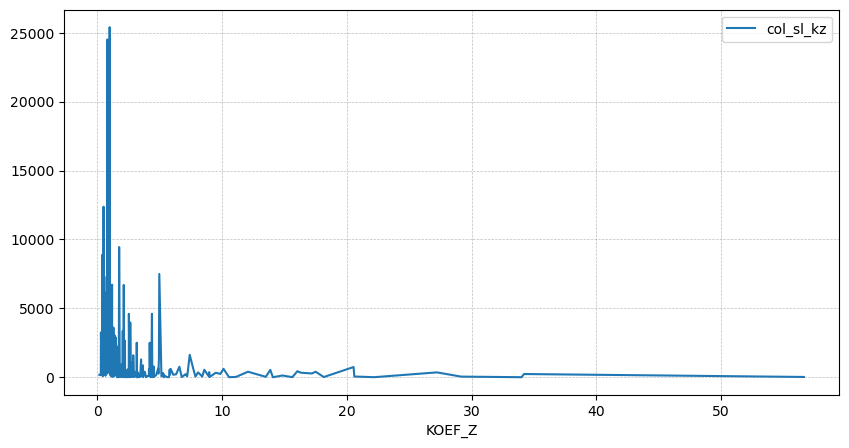

In [371]:
df_w_kz = df_w.groupby('KOEF_Z', as_index=False)\
              .agg({'SchetSluchID':'count'})\
               .rename(columns = {'SchetSluchID':'col_sl_kz'}).plot(x = 'KOEF_Z', y = 'col_sl_kz')

plt.grid(True, which='both', axis='both', linestyle='--', color='gray', alpha=0.5, linewidth=0.5)


In [372]:
 df_w.query("KOEF_Z > 4 & KOEF_Z < 6").value_counts('DS1').head(1)

DS1
U07.1    6699
dtype: int64

 U07.1 = Коронавирусная инфекция COVID-19 у взрослых
 

Финальные данные для работы без учета диагноза ковид

In [373]:
df_ks_notcov = df_ks.query("DS1 != 'U07.1'")
df_ds_notcov = df_ds.query("DS1 != 'U07.1'")

# Анализ



In [414]:
df_ks_train = df_ks.query("KOEF_Z < 15")[['CODE_MO','KOEF_Z', 'KOEF_U', 'KOEF_UP','long']]
df_ds_train = df_ds.query("KOEF_Z < 10")[['CODE_MO','KOEF_Z', 'KOEF_U', 'KOEF_UP','long']]

<AxesSubplot:>

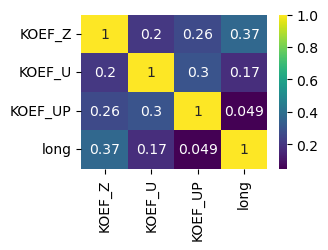

In [399]:
plt.rcParams["figure.figsize"] = [3,2]
sns.heatmap(df_ks_train.corr(),  cmap = 'viridis',annot = True)

<AxesSubplot:>

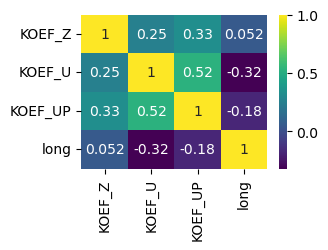

In [400]:
sns.heatmap(df_ds_train.corr(),  cmap = 'viridis',annot = True)

1) Построение нормированного распределения коэффициента затратоемкости:
  - Общий график с общим коэффиентом (full)
  - По уровням МО (КЗ)
  
  
  График violinplot показывает распределение данных в виде симметричной колокольной кривой (ядерной оценки плотности) на основе ящика с усами. Чем шире скрипка, тем больше данных в этом диапазоне значений. Чем выше скрипка, тем больше плотность данных в этом диапазоне значений. Ящик с усами на графике показывает интерквартильный размах (IQR) - разницу между 75-м и 25-м процентилями данных, а также медиану (50-й процентиль). График violinplot позволяет оценить распределение данных и их разброс, а также выделить потенциальные выбросы.
  

In [207]:
mean_value_ks = round(df_ks_notcov['fullkoef'].mean(), 2)
mean_value_ds = round(df_ds_notcov['fullkoef'].mean(), 2)

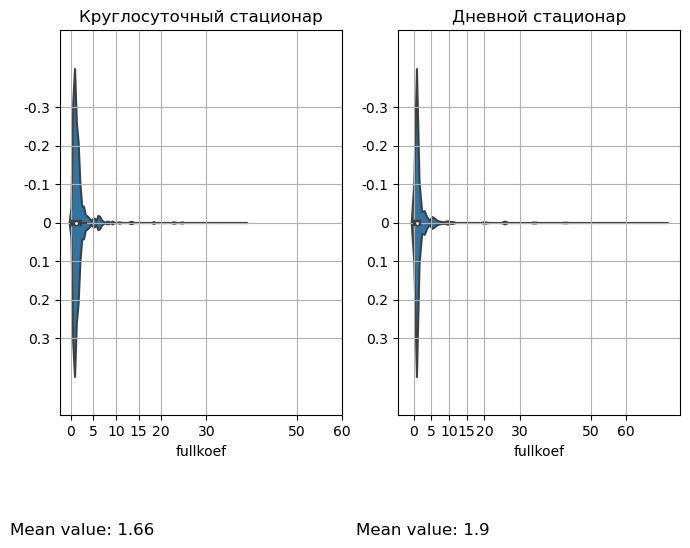

In [383]:
plt.rcParams["figure.figsize"] = [7, 3]

fig, axs = plt.subplots(1, 2, figsize=(8, 5))

sns.violinplot(data=df_ks_notcov, x='fullkoef', ax=axs[0])
axs[0].set_title('Круглосуточный стационар')
axs[0].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[0].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[0].set_xticks([0, 5, 10, 15, 20, 30,50,60])
axs[0].set_xticklabels([0, 5, 10, 15, 20, 30,50,60]) # добавляем значения на ось y
axs[0].text(2.5, 0.8, f'Mean value: {mean_value_ks}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[0].grid(True) # добавляем сетку


sns.violinplot(data=df_ds_notcov, x='fullkoef', ax=axs[1])
axs[1].set_title('Дневной стационар')
axs[1].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[1].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[1].set_xticks([0, 5, 10, 15, 20, 30,50,60])
axs[1].set_xticklabels([0, 5, 10, 15, 20, 30,50,60]) # добавляем значения на ось y
axs[1].text(2.5, 0.8, f'Mean value: {mean_value_ds}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[1].grid(True) # добавляем сетку



In [209]:
mean_value_ks_1 = round(df_ks_notcov.query("Level == 1")['fullkoef'].mean(), 2)
mean_value_ds_1 = round(df_ds_notcov.query("Level == 1")['fullkoef'].mean(), 2)
mean_value_ks_2 = round(df_ks_notcov.query("Level in (2.1, 2.2, 2.3,2.4, 2.5)")['fullkoef'].mean(), 2)
mean_value_ds_2 = round(df_ds_notcov.query("Level in (2.1, 2.2, 2.3,2.4, 2.5)")['fullkoef'].mean(), 2)
mean_value_ks_3 = round(df_ks_notcov.query("Level in (3.1, 3.2, 3.3)")['fullkoef'].mean(), 2)
mean_value_ds_3 = round(df_ds_notcov.query("Level in (3.1, 3.2, 3.3)")['fullkoef'].mean(), 2)

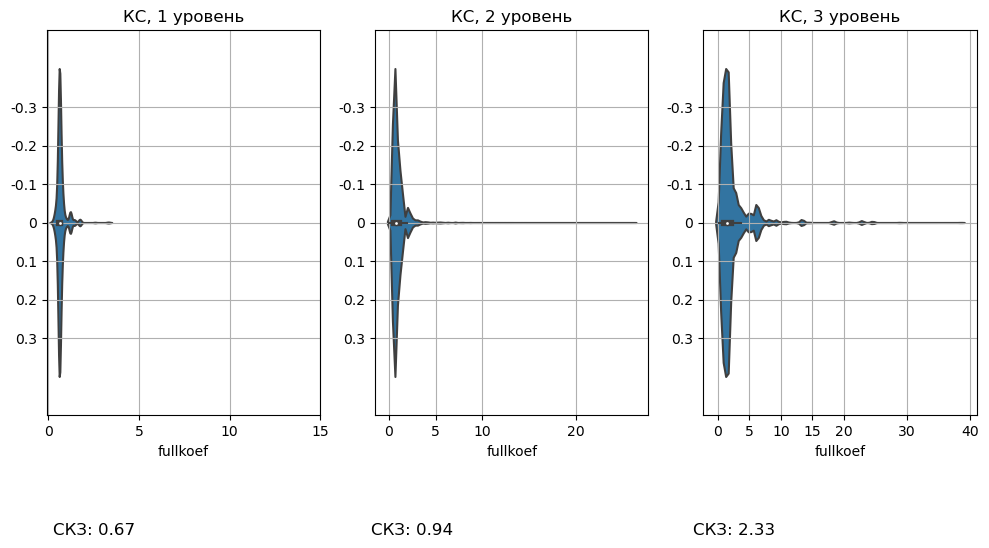

In [384]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

sns.violinplot(data=df_ks_notcov.query("Level == 1"), x='fullkoef', ax=axs[0])
axs[0].set_title('КС, 1 уровень')
axs[0].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[0].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[0].set_xticks([0, 5, 10, 15])
axs[0].set_xticklabels([0, 5, 10, 15]) # добавляем значения на ось y
axs[0].text(2.5, 0.8, f'СКЗ: {mean_value_ks_1}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[0].grid(True) # добавляем сетку


sns.violinplot(data=df_ks_notcov.query("Level in (2.1, 2.2, 2.3,2.4, 2.5)"), x='fullkoef', ax=axs[1])
axs[1].set_title('КС, 2 уровень')
axs[1].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[1].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[1].set_xticks([0, 5, 10, 20])
axs[1].set_xticklabels([0, 5, 10, 20]) # добавляем значения на ось y
axs[1].text(2.5, 0.8, f'СКЗ: {mean_value_ks_2}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[1].grid(True) # добавляем сетку

sns.violinplot(data=df_ks_notcov.query("Level in (3.1, 3.2, 3.3)"), x='fullkoef', ax=axs[2])
axs[2].set_title('КС, 3 уровень')
axs[2].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[2].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[2].set_xticks([0, 5, 10, 15, 20, 30,40])
axs[2].set_xticklabels([0, 5, 10, 15, 20, 30,40]) # добавляем значения на ось y
axs[2].text(2.5, 0.8, f'СКЗ: {mean_value_ks_3}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[2].grid(True) # добавляем сетку


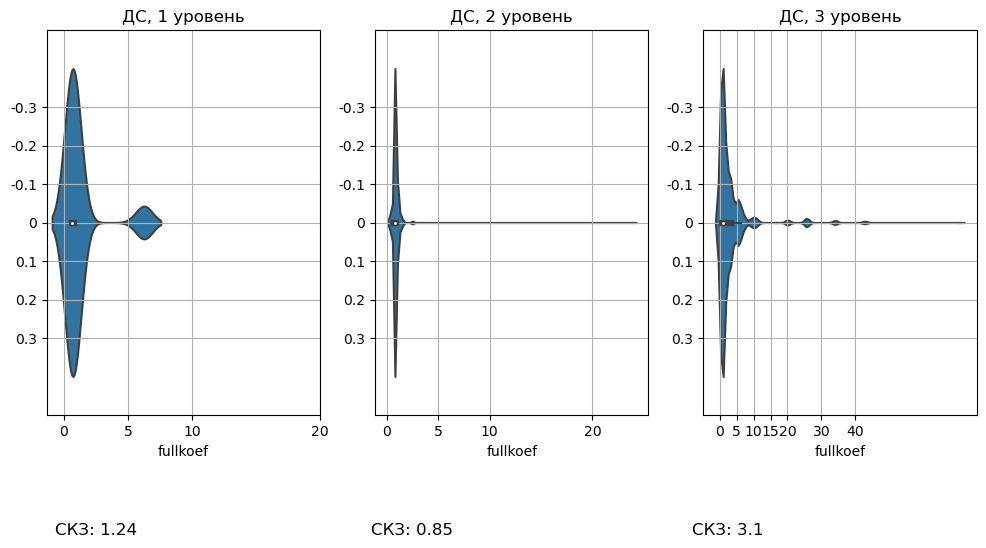

In [385]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

sns.violinplot(data=df_ds_notcov.query("Level == 1"), x='fullkoef', ax=axs[0])
axs[0].set_title('ДС, 1 уровень')
axs[0].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[0].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[0].set_xticks([0, 5, 10, 20])
axs[0].set_xticklabels([0, 5, 10, 20]) # добавляем значения на ось y
axs[0].text(2.5, 0.8, f'СКЗ: {mean_value_ds_1}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[0].grid(True) # добавляем сетку


sns.violinplot(data=df_ds_notcov.query("Level in (2.1, 2.2, 2.3,2.4, 2.5)"), x='fullkoef', ax=axs[1])
axs[1].set_title('ДС, 2 уровень')
axs[1].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[1].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[1].set_xticks([0, 5, 10, 20])
axs[1].set_xticklabels([0, 5, 10, 20]) # добавляем значения на ось y
axs[1].text(2.5, 0.8, f'СКЗ: {mean_value_ds_2}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[1].grid(True) # добавляем сетку

sns.violinplot(data=df_ds_notcov.query("Level in (3.1, 3.2, 3.3)"), x='fullkoef', ax=axs[2])
axs[2].set_title('ДС, 3 уровень')
axs[2].set_yticks([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3])
axs[2].set_yticklabels([-0.3, -0.2,-0.1,0,0.1, 0.2, 0.3]) # добавляем значения на ось x
axs[2].set_xticks([0, 5, 10, 15, 20, 30,40])
axs[2].set_xticklabels([0, 5, 10, 15, 20, 30,40]) # добавляем значения на ось y
axs[2].text(2.5, 0.8, f'СКЗ: {mean_value_ds_3}', ha='center', va='center', fontsize=12) # добавляем текст на график
axs[2].grid(True) # добавляем сетку

In [295]:
df_ks_notcov_mo = df_ks_notcov.groupby(['NAM_MOK', 'CODE_MO'], as_index = False)\
    .agg({'SchetSluchID':'count','KOEF_Z':'mean','KOEF_U':'mean','KOEF_UP':'mean', 'fullkoef':'mean','long':'mean','SL_SUMV':'sum'})\
    .rename(columns = {'SchetSluchID':'count_cases', 'SL_SUMV':'sum_money'})\

df_ks_notcov_mo['sum_money_mean'] = df_ks_notcov_mo['sum_money'] / df_ks_notcov_mo['count_cases']
df_ks_notcov_mo['weight'] = df_ks_notcov_mo['fullkoef']*df_ks_notcov_mo['count_cases']/df_ks_notcov_mo['count_cases'].sum()


df_ks_notcov_mo.KOEF_Z = df_ks_notcov_mo.KOEF_Z.round(2)
df_ks_notcov_mo.KOEF_U = df_ks_notcov_mo.KOEF_U.round(2)
df_ks_notcov_mo.KOEF_UP = df_ks_notcov_mo.KOEF_UP.round(2)
df_ks_notcov_mo.long = df_ks_notcov_mo.long.round(2)
df_ks_notcov_mo.sum_money_mean = df_ks_notcov_mo.sum_money_mean.round(2)
df_ks_notcov_mo.weight = df_ks_notcov_mo.weight.round(2)
df_ks_notcov_mo.fullkoef = df_ks_notcov_mo.fullkoef.round(2)

In [296]:
df_ks_notcov_mo.sort_values('weight', ascending = False)

,NAM_MOK,CODE_MO,count_cases,KOEF_Z,KOEF_U,KOEF_UP,fullkoef,long,sum_money,sum_money_mean,weight
23,ГБУЗ ЛОКБ,470111,43535,2.50,1.34,0.97,3.38,13.50,4.488730e+09,103106.24,0.53
24,ГБУЗ ЛОКОД,470113,15699,3.14,1.31,0.97,4.06,3.66,1.695323e+09,107989.22,0.23
8,"ГБУЗ ЛО ""ГАТЧИНСКАЯ КМБ""",470032,30505,1.35,1.20,0.84,1.36,8.43,1.295045e+09,42453.54,0.15
4,"ГБУЗ ЛО ""ВСЕВОЛОЖСКАЯ КМБ""",470014,24551,1.27,1.28,0.96,1.57,6.38,1.257256e+09,51209.99,0.14
19,"ГБУЗ ЛО ""ТИХВИНСКАЯ МБ""",470071,15014,1.28,1.20,0.87,1.35,7.28,6.482546e+08,43176.67,0.07
25,"ЛОГБУЗ ""ДКБ""",470091,12126,1.18,1.33,0.97,1.57,9.16,6.176636e+08,50937.13,0.07
22,ГБУЗ ЛО «КИНГИСЕППСКАЯ МБ»,470041,10731,1.11,1.06,0.85,1.02,7.60,3.713466e+08,34605.04,0.04
21,"ГБУЗ ЛО ""ТОСНЕНСКАЯ КМБ""",470074,9735,1.14,1.06,0.86,1.07,7.82,3.200095e+08,32872.06,0.04
3,"ГБУЗ ЛО ""ВОЛХОВСКАЯ МБ""",470001,11057,1.09,1.02,0.86,0.98,7.56,3.445671e+08,31162.80,0.04
6,"ГБУЗ ЛО ""ВЫБОРГСКАЯ МБ""",470136,9465,1.28,1.13,0.85,1.24,8.15,3.543095e+08,37433.65,0.04


In [293]:
df_ds_notcov_mo = df_ds_notcov.groupby(['NAM_MOK', 'CODE_MO'], as_index = False)\
    .agg({'SchetSluchID':'count','KOEF_Z':'mean','KOEF_U':'mean','KOEF_UP':'mean', 'fullkoef':'mean','long':'mean','SL_SUMV':'sum'})\
    .rename(columns = {'SchetSluchID':'count_cases', 'SL_SUMV':'sum_money'})\

df_ds_notcov_mo['sum_money_mean'] = df_ds_notcov_mo['sum_money'] / df_ds_notcov_mo['count_cases']
df_ds_notcov_mo['weight'] = df_ds_notcov_mo['fullkoef']*df_ds_notcov_mo['count_cases']/df_ds_notcov_mo['count_cases'].sum()

df_ds_notcov_mo.KOEF_Z = df_ds_notcov_mo.KOEF_Z.round(2)
df_ds_notcov_mo.KOEF_U = df_ds_notcov_mo.KOEF_U.round(2)
df_ds_notcov_mo.KOEF_UP = df_ds_notcov_mo.KOEF_UP.round(2)
df_ds_notcov_mo.long = df_ds_notcov_mo.long.round(2)
df_ds_notcov_mo.sum_money_mean = df_ds_notcov_mo.sum_money_mean.round(2)
df_ds_notcov_mo.weight = df_ds_notcov_mo.weight.round(2)
df_ds_notcov_mo.fullkoef = df_ds_notcov_mo.fullkoef.round(2)

# Детальный анализ СКЗ для каждой МО

<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

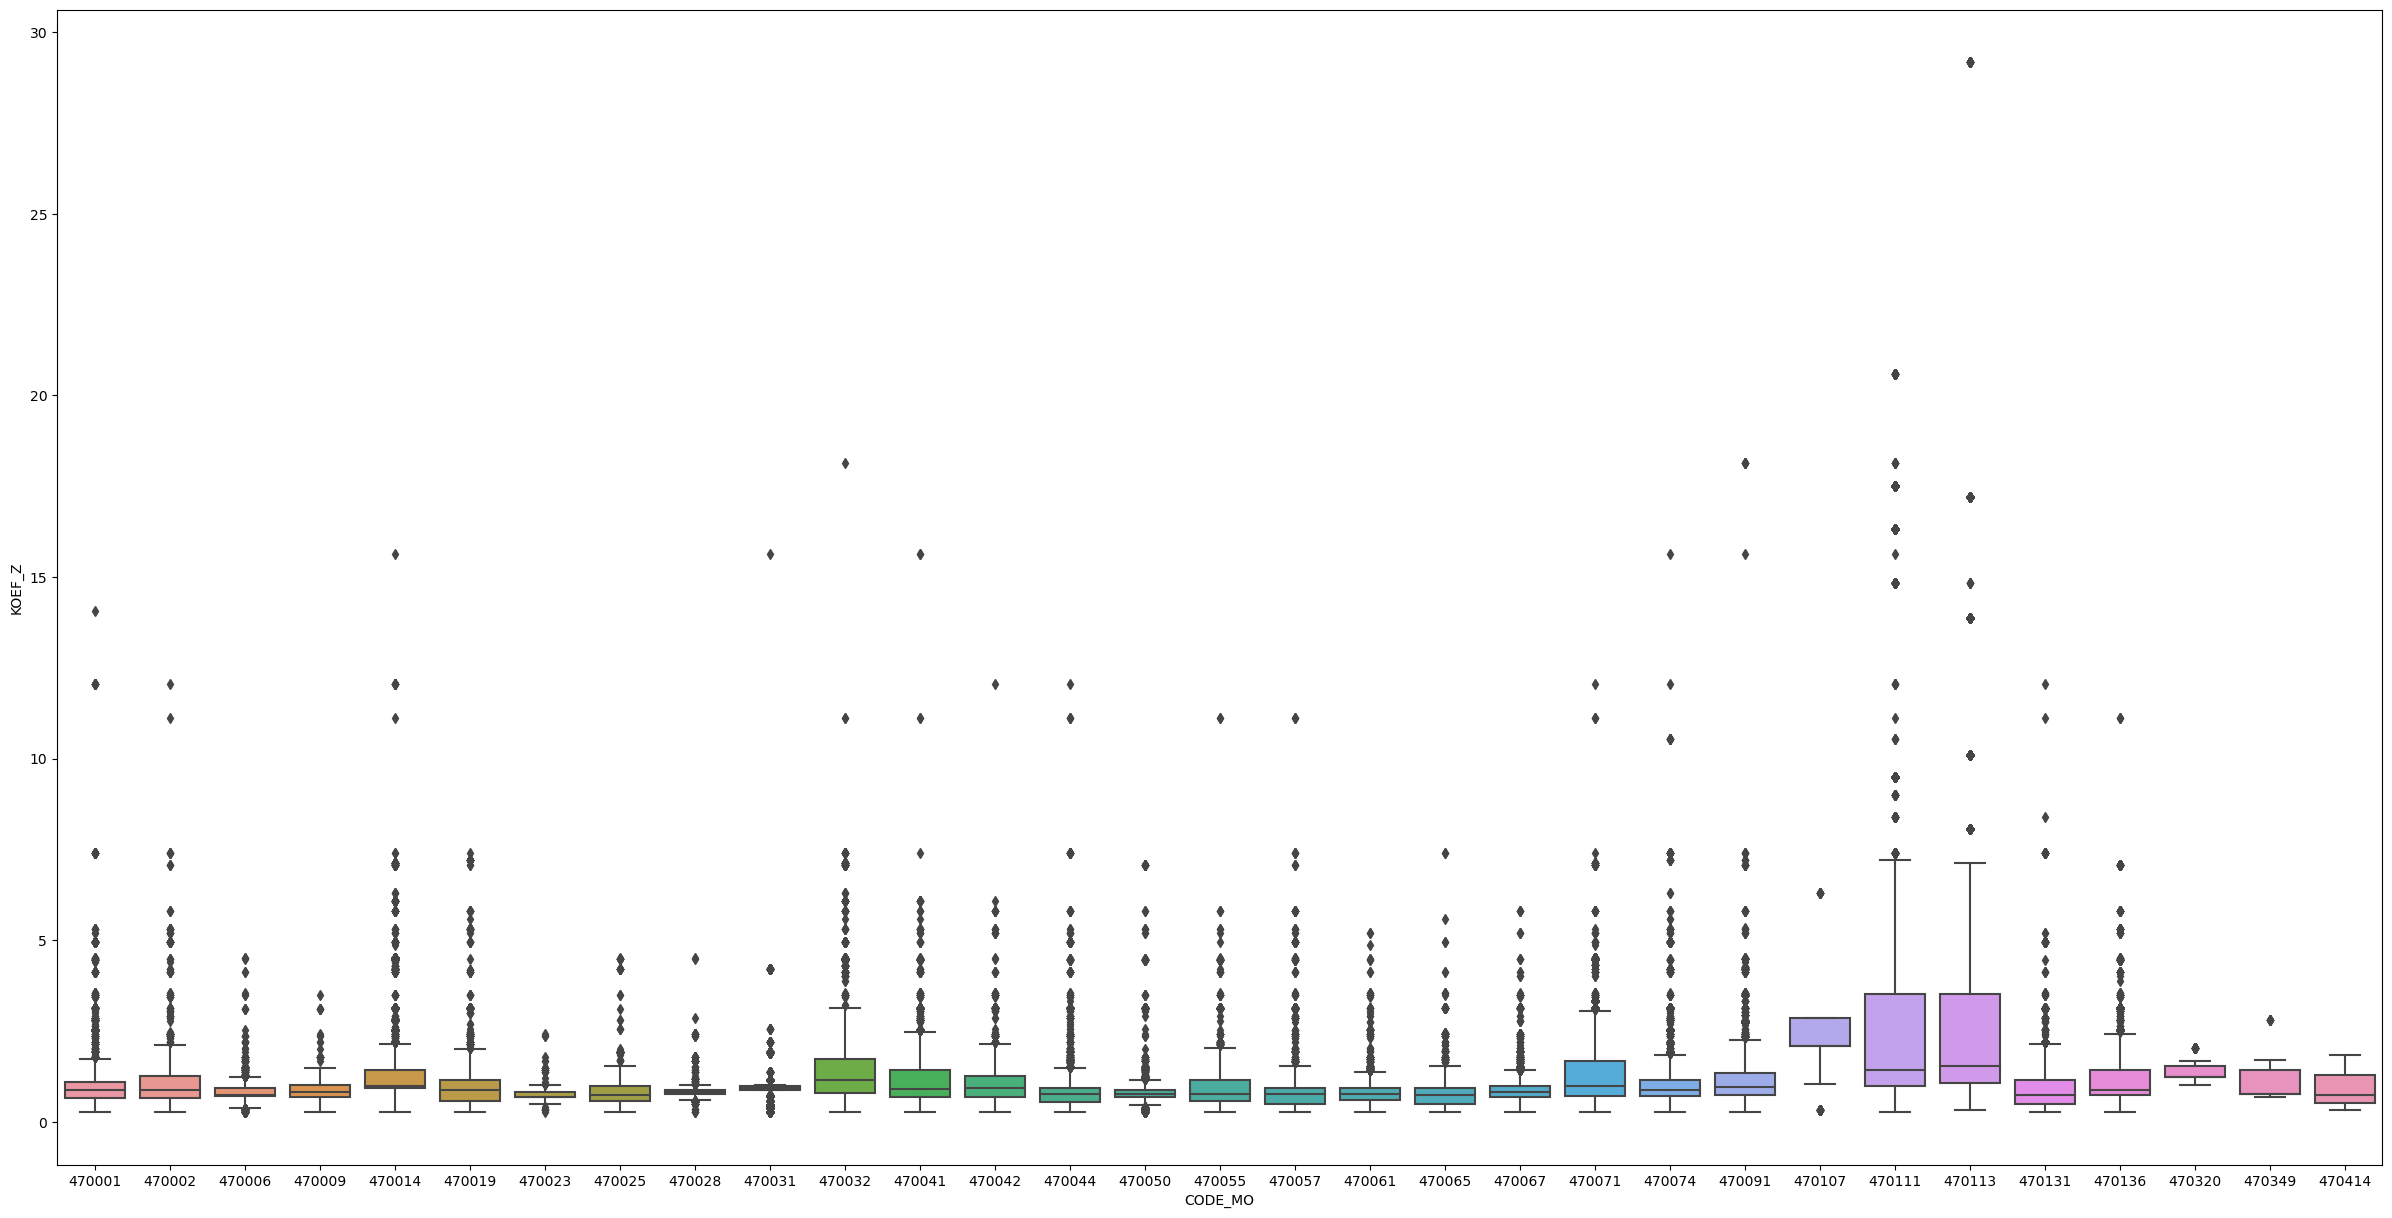

In [432]:
plt.rcParams["figure.figsize"] = [30,15]
sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ks_notcov)


<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

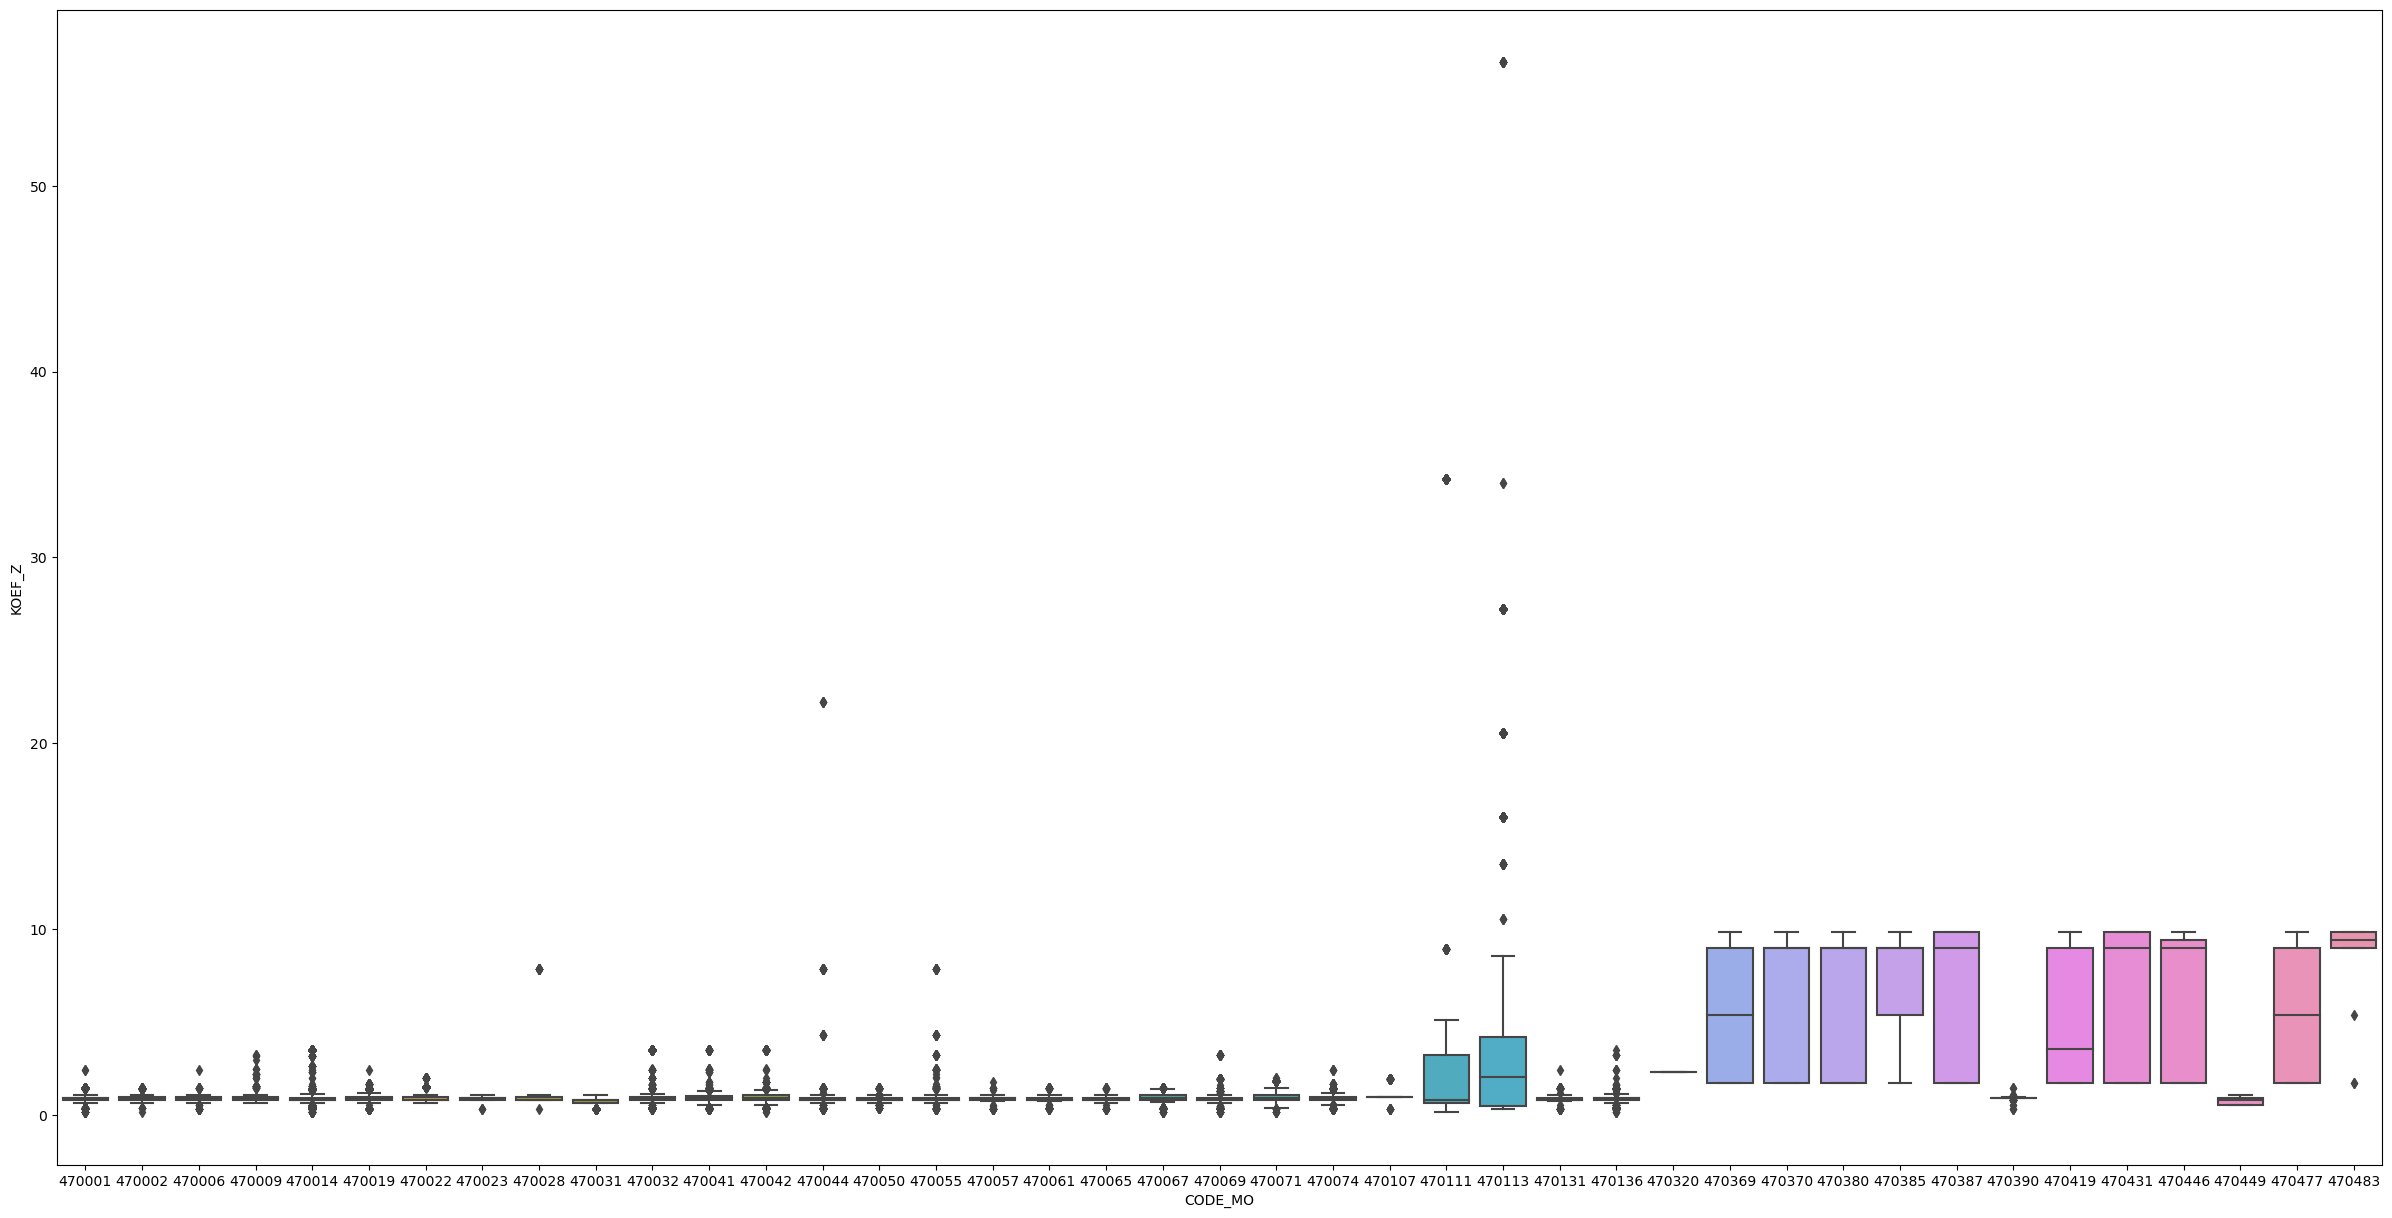

In [433]:
sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ds_notcov)

<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

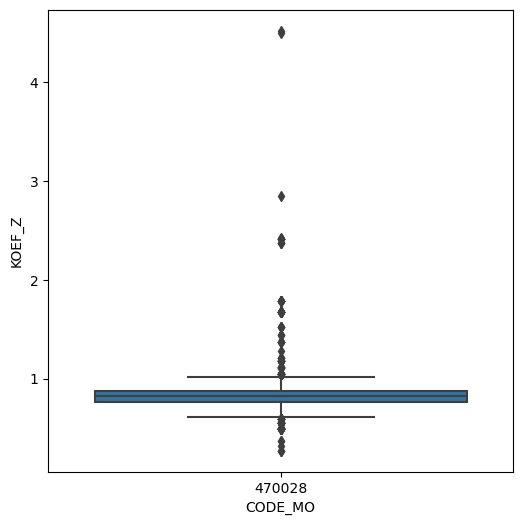

In [434]:
plt.rcParams["figure.figsize"] = [6,6]

sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ks_notcov.query("Level == 1"))

<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

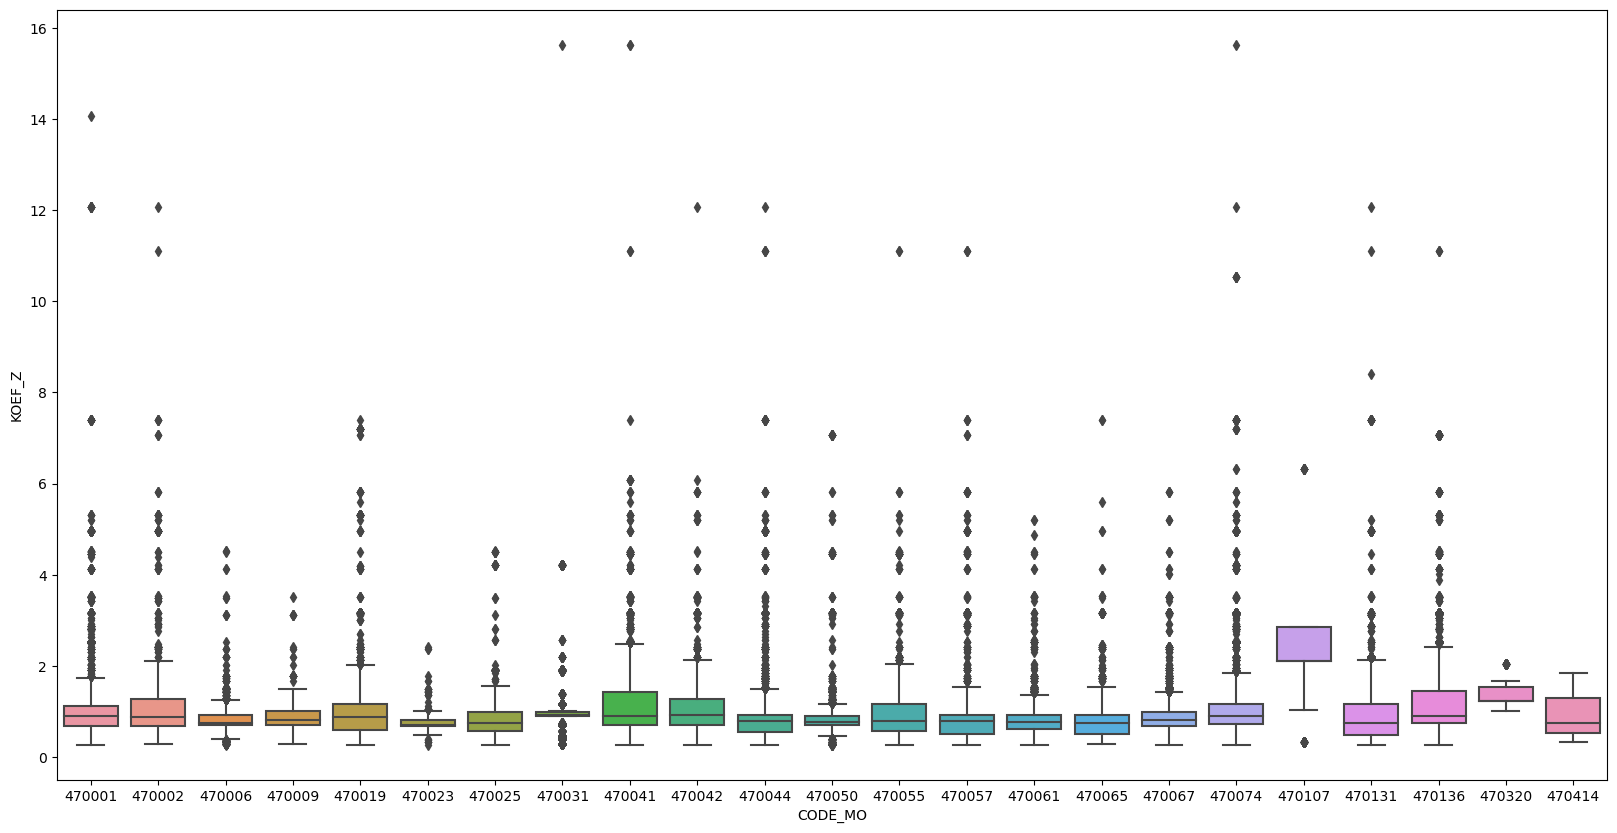

In [435]:
plt.rcParams["figure.figsize"] = [20,10]
sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ks_notcov.query("Level in (2.1, 2.2, 2.3,2.4, 2.5)"))

<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

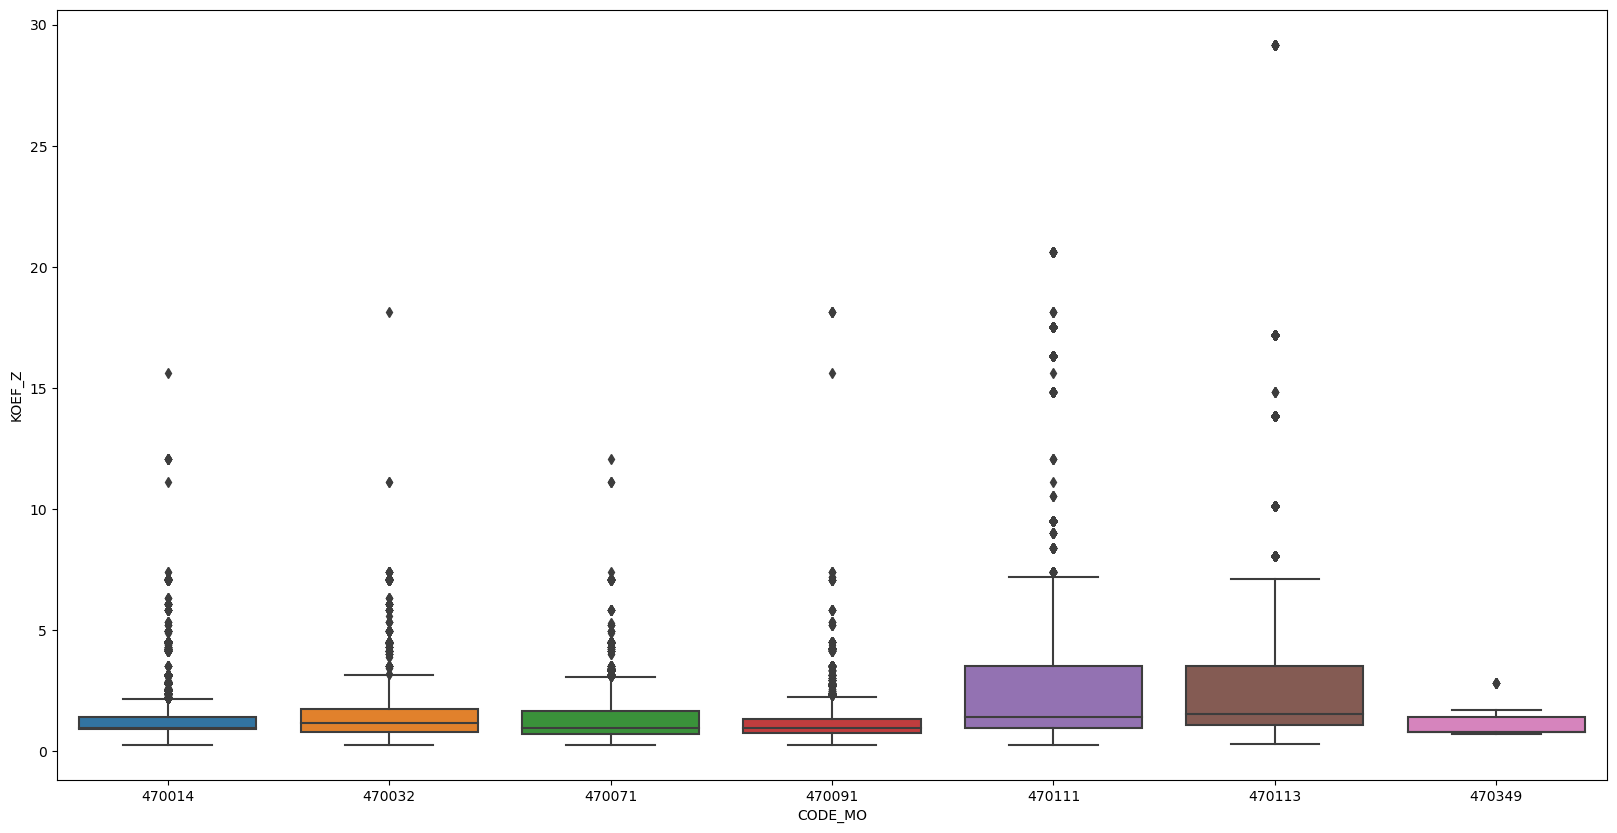

In [436]:
sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ks_notcov.query("Level in (3.1, 3.2, 3.3)"))

<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

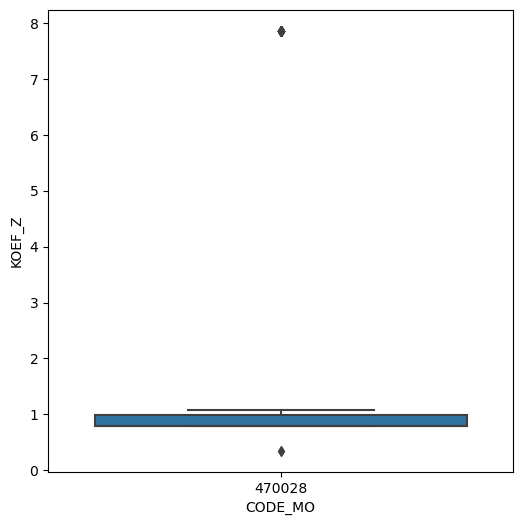

In [446]:
plt.rcParams["figure.figsize"] = [6,6]

sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ds_notcov.query("Level == 1"))


<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

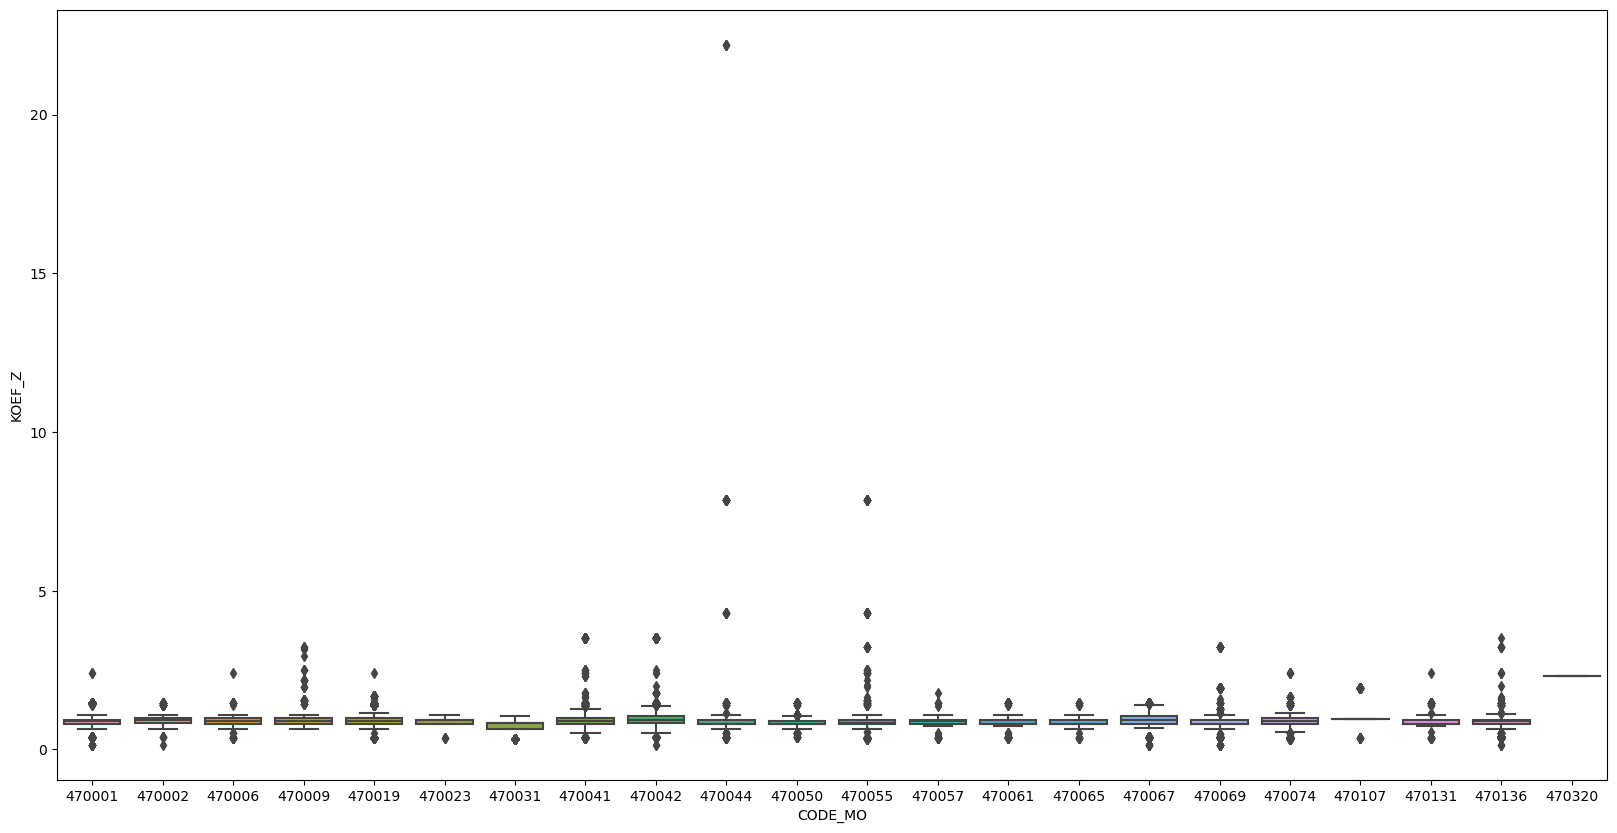

In [445]:
plt.rcParams["figure.figsize"] = [20,10]
sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ds_notcov.query("Level in (2.1, 2.2, 2.3,2.4, 2.5)"))

<AxesSubplot:xlabel='CODE_MO', ylabel='KOEF_Z'>

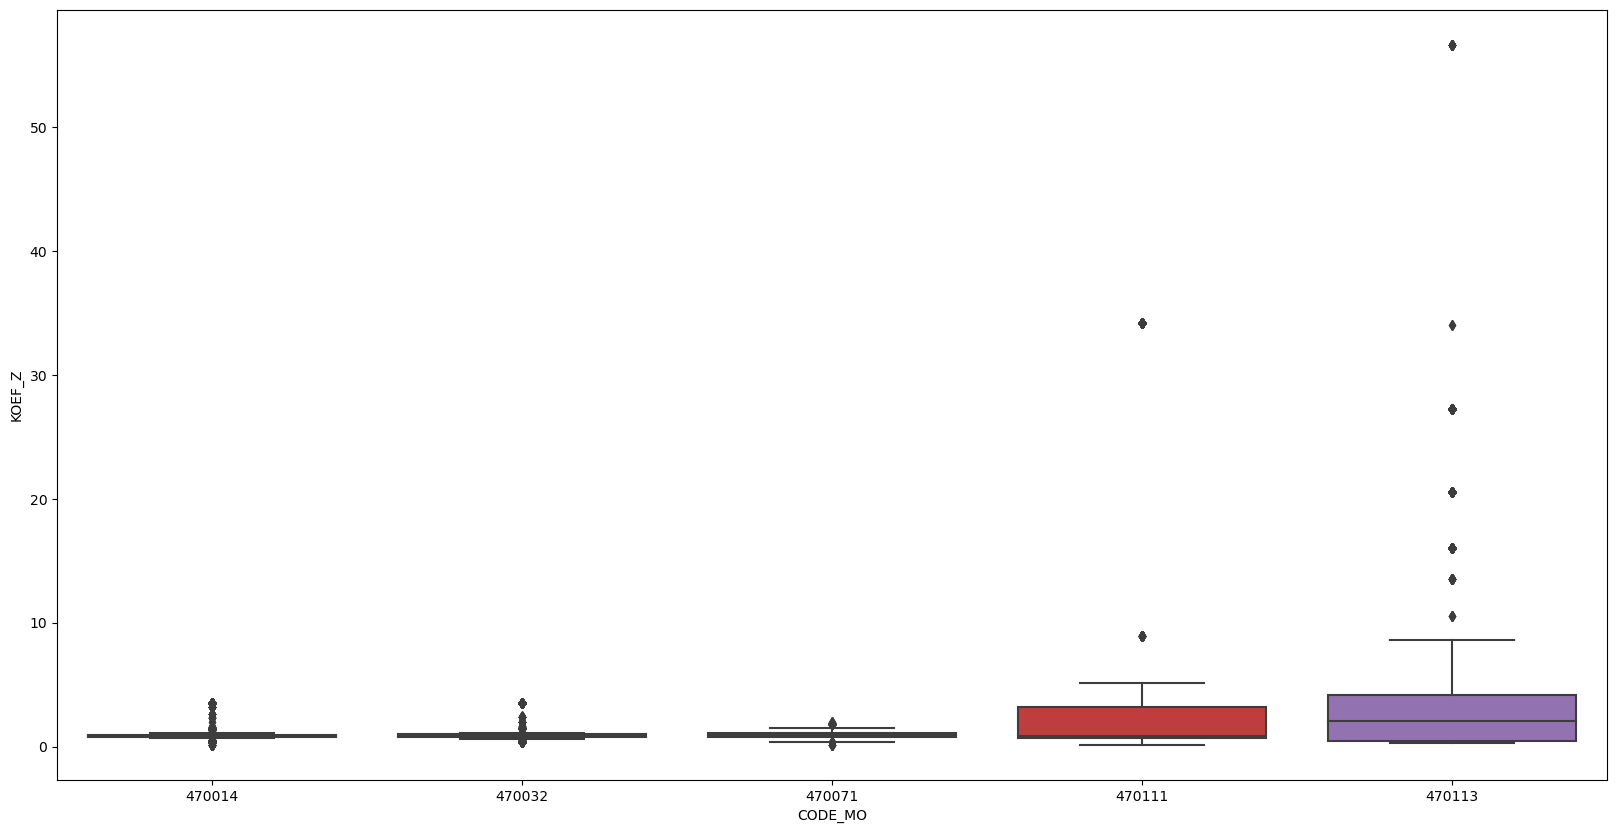

In [439]:
sns.boxplot(y='KOEF_Z', x='CODE_MO', data=df_ds_notcov.query("Level in (3.1, 3.2, 3.3)"))